# B-Splines Einführung

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Implementieren einer B-Spline Klasse

### Charakteristische Funktion

Wir beginnen die Implementierung einer B-Spline Klasse mit der Charakteristischen Funktion

$$N_{j,1}(x) = \chi_{[\tau_j, \tau_{j+1})}(x) := \begin{cases}1 & \quad \text{für}\ x\in[\tau_j, \tau_{j+1})\\
0 & \quad \text{sonst,}\end{cases}\quad j = 0, \ldots ,\ell,$$

In [2]:
class BSplines:
    def __init__(self,tau):
        self.tau = np.array(tau)
    
    def N(self,x,j):
        ind = (self.tau[j] <= x)*(x < self.tau[j+1]) 
        return np.array(ind, dtype=float)

Als Test benutzen wir ein Array von $x$-Werte

In [3]:
x = np.linspace(0,5,200)

Für den Test Case benutzen wir das Intervall $[1,4]$, wie im Skript. Um drei Intervalle zu erhalten definieren wir die Knoten

In [4]:
tau = [1,2,3,4]

und instanzieren die Klasse BSpline damit:

In [5]:
b = BSplines(tau)

b ist ein Objekt mit den definierten Parameter, welches die Grundfunktionalität hat, die charakteristische Funktion auszuwerten.

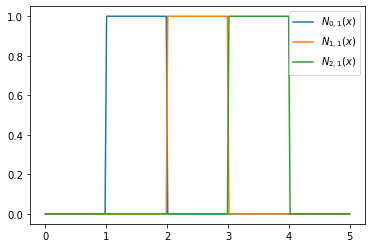

In [6]:
[plt.plot(x,b.N(x,k), label='$N_{'+str(k)+',1}(x)$') for k in range(len(tau)-1)]
plt.legend()
plt.show()

### B-Spline Basis höherer Ordnung

Sei $t_1 < t_2 < \ldots < t_n$ eine beliebige Folge von paarweise verschiedenen Knoten. Dann werden die B-Splines $N_{j,k}$ der Ordnung $k$ $(1\le k \le n)$ rekursiv definiert durch

\begin{equation}\label{eg:BSplineBasis}\begin{split}
N_{j,1}(x) := & \chi_{[t_j, t_{j+1})}(x)\quad \text{für}\ j=1,\ldots , n-1,\\[1.2ex]
N_{j,k}(x) := &\frac{x-t_j}{t_{j+k-1}-t_j} N_{j,k-1}(x) + \frac{t_{j+k}-x}{t_{j+k}-t_{j+1}} N_{j+1,k-1}(x),\\
& \text{für}\ k = 2, \ldots , n-1,\quad \text{und}\quad j=1,\ldots , n-k.\end{split}\end{equation}

Nun erweitern wir die Klasse um B-Spline Basen höherer Ordnung zu erhalten. Die Funktion N ruft sich dabei selber wieder auf. Das bedeutet, dass wir acht darauf geben müssen, dass diese Rekursion bei $k=1$ stoppt.

In [7]:
class BSplines:
    def __init__(self,t):
        self.t = np.array(t)
    
    def N(self,x,j,k):
        '''BSpline Basis Funktion'''
        
        if k == 1:
            ind = (self.t[j] <= x)*(x < self.t[j+1]) 
            return np.array(ind, dtype=float)
        else:
            y = (x-self.t[j])/(self.t[j+k-1]-self.t[j])*self.N(x, j, k-1)
            y += (self.t[j+k]-x)/(self.t[j+k]-self.t[j+1])*self.N(x, j+1, k-1)
            return y

Für einen ersten Test benutzen wir wieder die selben Knoten:

In [8]:
b = BSplines(tau)

Für Ordnung 1 bebleibt alles gleich:

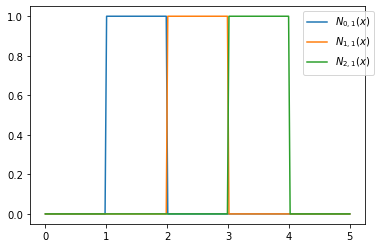

In [9]:
[plt.plot(x,b.N(x,j,1), label='$N_{'+str(j)+',1}(x)$') for j in range(len(tau)-1)]
plt.legend(bbox_to_anchor=(0.8,1))
plt.savefig('BSplineBasis1.pdf')
plt.show()

Für Ordnung 2 erhalten wir:

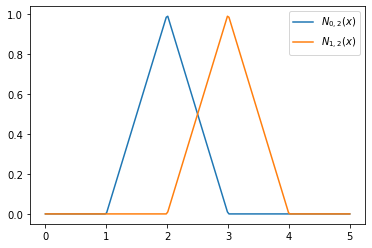

In [10]:
[plt.plot(x,b.N(x,j,2), label='$N_{'+str(j)+',2}(x)$') for j in range(len(tau)-2)]
plt.legend()
plt.show()

Der Bereich in dem die B-Spline Basisfunktion ungleich null ist, erstreckt sich für die Ordnung 2 über zwei Intervalle. Mit dem angegebenen Knoten-Set erhalten wir daher keine Basisfunktion für die der Funktionswert bei 1 bzw. 4 ungleich 0 ist.

$\Rightarrow$ Wir müssen daher das Knoten-Set erweitern.

Für unser Beispiel mit Ordnung 2 erweitern wir das Set mit zwei zusätzlichen Punkte:

In [11]:
t = [0] + tau + [5]
t

[0, 1, 2, 3, 4, 5]

In [12]:
b = BSplines(t)

Damit erhalten wir zwei zusätzliche Basisfunktionen:

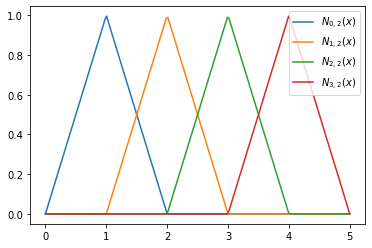

In [13]:
[plt.plot(x,b.N(x,j,2), label='$N_{'+str(j)+',2}(x)$') for j in range(len(tau))]
plt.legend()
plt.show()

Der Ansatz hat einen unschönen Effekt: Die Spline ist ausserhalb unseres gewünschten Intervalls $[1,4]$ nicht mehr null.

Das Problem lösen wir, in dem wir nicht mehr fordern, dass die Knotenmenge streng monoton ist. Diese erfordert jedoch eine Erweiterung unserer Klasse, ansonsten erhalten wir eine Division durch null.

In [14]:
class BSplines:
    def __init__(self,t):
        self.t = np.array(t)
    
    def N(self,x,j,k):
        '''BSpline Basis Funktion'''
        
        if k == 1:
            ind = (self.t[j] <= x)*(x < self.t[j+1])
            return np.array(ind, dtype=float)
        else:
            if type(x) == np.ndarray:
                y = np.zeros_like(x)
            else:
                y = 0
            
            if self.t[j] < self.t[j+k-1]:
                y += (x-self.t[j])/(self.t[j+k-1]-self.t[j])*self.N(x, j, k-1)
            if self.t[j+1] < self.t[j+k]:
                y += (self.t[j+k]-x)/(self.t[j+k]-self.t[j+1])*self.N(x, j+1, k-1)
            return y

Als erweitertes Knotenset können wir nun die Punkte wählen:

In [15]:
t = [tau[0]] + tau + [tau[-1]]
t

[1, 1, 2, 3, 4, 4]

In [16]:
b = BSplines(t)

Damit erhalten wir zwei zusätzliche Basisfunktionen, wie gewünscht:

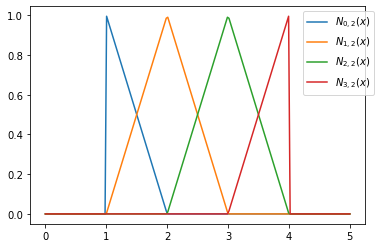

In [17]:
[plt.plot(x,b.N(x,j,2), label='$N_{'+str(j)+',2}(x)$') for j in range(len(t)-2)]
plt.legend(bbox_to_anchor=(0.8,1))
plt.savefig('BSplineBasis2.pdf')
plt.show()

Ein Punkt gilt es zu beachten: am rechten Rand erhalten wir den Funktionswert null, was mit der Definition übereinstimmt!

In [18]:
b.N(4,3,2)

0.0

Diese direkte Implementierung ist bezüglich Rechenaufwand nicht optimal. In unserem Code werden unter anderem Punkte, welche ausserhalb des Supports liegen ebenfalls numerisch berechnet, was unnötig ist. Das Problem lösen wir jedoch hier nicht, in Bibliotheken wie SciPy ist dies entsprechend umgesetzt. Der Fokus liegt auf der Funktionsweise von B-Splines.

### Erweiterung der Knotenmenge für beliebige Ordnung

Für die Ordnung 3 machen wir den Ansatz

In [19]:
t = [tau[0],tau[0]] + tau + [tau[-1],tau[-1]]
t

[1, 1, 1, 2, 3, 4, 4, 4]

In [20]:
b = BSplines(t)

Damit erhalten wir zwei zusätzliche Basisfunktionen, wie gewünscht:

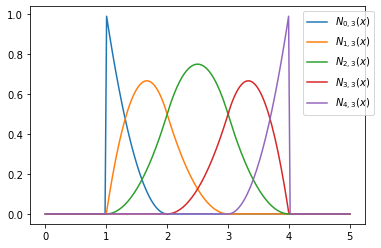

In [21]:
[plt.plot(x,b.N(x,j,3), label='$N_{'+str(j)+',3}(x)$') for j in range(len(t)-3)]
plt.legend(bbox_to_anchor=(0.8,1))
plt.show()

Die maximale Ordnung mit vollem Support ist in unserem Beispiel 3. Es gilt

$$N_{2,3}(x)>0\quad \forall\ x\in[1,4).$$

Die Anzahl B-Spline Basisfunktionen ist gegeben durch

$$\text{Anzahl Knoten} - 2 + \text{Ordnung}$$

In [22]:
len(tau)-2 + 3

5

oder

$$\text{Anzahl erweiterte Knoten} - \text{Ordnung}.$$

In [23]:
len(t) - 3

5

### Hierarchie der Basisfunktionen

Für das Verständnis betrachten wir die B-Spline Basis $N_{2,3}(x)$ und überlegen uns welche Basisfunktionen in der Definition beteiligt sind.

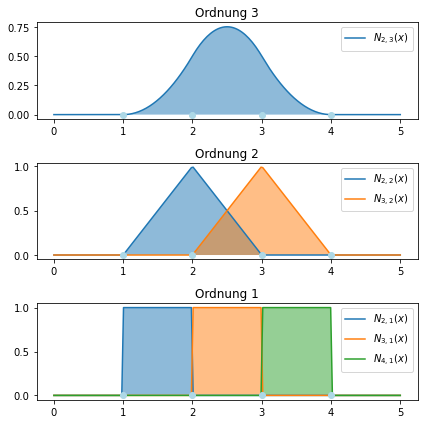

In [24]:
plt.figure(figsize=(6,6))
plt.subplot(3,1,1)
plt.plot(x,b.N(x,2,3),label=r'$N_{2,3}(x)$')
plt.fill_between(x,b.N(x,2,3),alpha=0.5)
plt.plot(tau, np.zeros_like(tau),'o',c='lightblue')
plt.title('Ordnung 3')
plt.legend()
plt.subplot(3,1,2)
plt.plot(x,b.N(x,2,2),label=r'$N_{2,2}(x)$')
plt.fill_between(x,b.N(x,2,2),alpha=0.5)
plt.plot(x,b.N(x,3,2),label=r'$N_{3,2}(x)$')
plt.fill_between(x,b.N(x,3,2),alpha=0.5)
plt.plot(tau, np.zeros_like(tau),'o',c='lightblue')
plt.title('Ordnung 2')
plt.legend()
plt.subplot(3,1,3)
plt.plot(x,b.N(x,2,1),label=r'$N_{2,1}(x)$')
plt.fill_between(x,b.N(x,2,1),alpha=0.5)
plt.plot(x,b.N(x,3,1),label=r'$N_{3,1}(x)$')
plt.fill_between(x,b.N(x,3,1),alpha=0.5)
plt.plot(x,b.N(x,4,1),label=r'$N_{4,1}(x)$')
plt.fill_between(x,b.N(x,4,1),alpha=0.5)
plt.plot(tau, np.zeros_like(tau),'o',c='lightblue')
plt.title('Ordnung 1')
plt.legend()
plt.tight_layout()
plt.savefig('HierarchieBSplines.pdf')
plt.show()

$$N_{2,3}(x) = \frac{x-t_2}{t_{4}-t_2} \underbrace{N_{2,2}(x)}_{\displaystyle \frac{x-t_2}{t_{3}-t_2} \underbrace{\color{blue}{N_{2,1}(x)}}_{\displaystyle\chi_{[t_2, t_3)}(x)} + \frac{t_{4}-x}{t_{4}-t_{3}} \underbrace{\color{orange}{N_{3,1}(x)}}_{\displaystyle \chi_{[t_3, t_{4})}(x)}} + \frac{t_{5}-x}{t_{5}-t_{3}} \underbrace{N_{3,2}(x)}_{\displaystyle \frac{x-t_3}{t_{4}-t_3} \underbrace{\color{orange}{N_{3,1}(x)}}_{\displaystyle \chi_{[t_3, t_{4})}(x)} + \frac{t_{5}-x}{t_{5}-t_{4}} \underbrace{\color{green}{N_{4,1}(x)}}_{\displaystyle \chi_{[t_4, t_{5})}(x)}}$$

In der finalen Version fügen wir diese Kontrolle noch in der Linearkombination von B-Spline Basisfunktionen ein.

$$S(x) = \sum_{j} c_j N_{j,k}(x)\quad x\in[a,b]$$


In [25]:
class BSplines:
    def __init__(self,t):
        self.t = np.array(t)
    
    def N(self,x,j,k):
        '''BSpline Basis Funktion'''

        if k == 1:
            ind = (self.t[j] <= x)*(x < self.t[j+1])
            return np.array(ind, dtype=float)
        else:
            if type(x) == np.ndarray:
                y = np.zeros_like(x)
            else:
                y = 0
            
            if self.t[j] < self.t[j+k-1]:
                y += (x-self.t[j])/(self.t[j+k-1]-self.t[j])*self.N(x, j, k-1)
            if self.t[j+1] < self.t[j+k]:
                y += (self.t[j+k]-x)/(self.t[j+k]-self.t[j+1])*self.N(x, j+1, k-1)
            return y
    
    def S(self,x,c,k):
        assert (len(c) <= len(self.t)-k)
        
        return sum(c[j] * self.N(x, j, k) for j in range(len(c)))

In [26]:
b = BSplines(t)

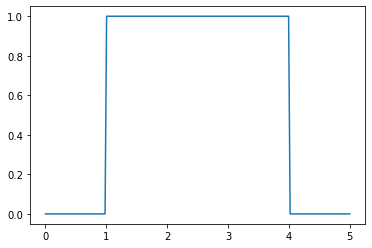

In [27]:
plt.plot(x,b.S(x,[1,1,1,1,1],3))

## Anwendung

Wir berechnen die B-Spline Interpolation durch die Punkte

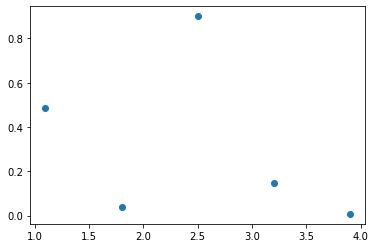

In [28]:
xi = np.linspace(1.1,3.9,5)
yi = np.random.rand(5)

plt.plot(xi,yi,'o')

Unter der Voraussetzung, dass in jedem Intervall mindestens ein Datenpunkt liegt, ist die Matrix

In [29]:
A = np.array([b.N(xi,j,3) for j in range(5)]).T
A

array([[0.81 , 0.185, 0.005, 0.   , 0.   ],
       [0.04 , 0.64 , 0.32 , 0.   , 0.   ],
       [0.   , 0.125, 0.75 , 0.125, 0.   ],
       [0.   , 0.   , 0.32 , 0.64 , 0.04 ],
       [0.   , 0.   , 0.005, 0.185, 0.81 ]])

regulär. Wir können damit leicht die Interpolierende B-Spline durch Punkte berechnen (Vgl. Skript Satz 5.1 und Bemerkung 5.3).

In [30]:
from scipy.linalg import qr, solve_triangular

In [31]:
q,r = qr(A, mode='economic')

In [32]:
c = solve_triangular(r, q.T@yi, lower = False)

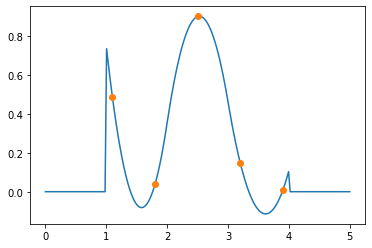

In [33]:
plt.plot(x,b.S(x,c,3))
plt.plot(xi,yi,'o')